In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def m_numbers(J): return np.arange(-J,J+1)
def vertice(n): return [ i+0.5 for i in range(0,n) ]

In [3]:
# parametros
L = 5 # tamaño de la caja
m = m_numbers(3/2) # numero cuantico m -> dim(m) = 2J+1
b = vertice(L) # vertice centro del dipolo magnetico
mag = 1/3 # magnitud del dipolo magnetico
C0 = np.zeros((L,L,L)).tolist() # configuracion inicial tensor 3D

N = 125
m number = [-1.5 -0.5  0.5  1.5]
vertice = [0.5, 1.5, 2.5, 3.5, 4.5]


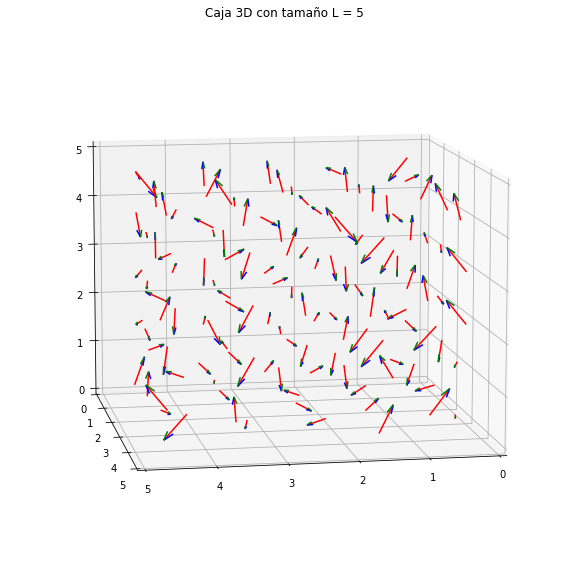

In [183]:
fig = plt.figure(figsize=(10,8),constrained_layout=True)
ax = fig.add_subplot(111, projection='3d')
ax.set_title(f"Caja 3D con tamaño L = {L}")

# -------------------------------------
print("N =",L**3)
print("m number =", m)
print("vertice =", b)
# -------------------------------------
xx, yy = np.meshgrid(range(L+1), range(L+1))
z = np.array([[1]*(L+1)]*(L+1))


# ------------------------------------- Configuracion inicial
for i in range(L):
    for j in range(L):
        for k in range(L):
            origin = np.array([b[i],b[j],b[k]]) # Origen centrado en los vertices
            rand1 = np.random.randint(0,360)
            #rand1 = 0
            #rand2 = 0
            rand2 = np.random.randint(0,180)
            rand3 = np.random.choice(m)
            eta = rand1*np.pi/180
            theta = rand2*np.pi/180
            V = np.array([[mag*np.cos(eta)*np.sin(theta), 
            mag*np.sin(eta)*np.sin(theta),
            mag*rand3]]) # Vector de momento dipolar magnetico
            C0[i][j][k] = V[0].tolist()
            ax.quiver(*origin, V[:,0], V[:,1], V[:,2] ,color=['r','b','g'],pivot='middle') # Graficar vectores
            continue

ax.set_xlim(0,L)
ax.set_ylim(0,L)
ax.set_zlim(0,L)
ax.view_init(10,80)


plt.grid()
plt.show()

In [195]:
c0 = np.flip(C0,axis=0).tolist()

In [31]:
def neightbors(d):
    conf_f = d[0]
    for i in range(len(d)-1):
        conf_f = np.add(conf_f,d[i+1])
    return list(conf_f)

In [177]:
def pbc(i,L):
    if i+1 > L-1:
        return 0
    elif i-1 < 0:
        return L-1
    else:
        return i

In [189]:
def monteCarlo(config,J,H,T):
    kb = 1.380649e-23 # constante de boltzmann [J/K]
    L = len(config)
    for i in range(L):
        for j in range(L):
            for k in range(L):
                conf_i = config[i][j][k]
                d = [config[pbc(i+1,L)][j][k], config[pbc(i-1,L)][j][k], config[i][pbc(j+1,L)][k], 
                    config[i][pbc(j-1,L)][k], config[i][j][pbc(k+1,L)], config[i][j][pbc(k-1,L)]]
                conf_j = neightbors(d)
                Ei = -J*np.dot(conf_i,conf_j) - conf_i[2]*H
                new_zcomp = np.random.choice(m)*mag
                conf_trial = [conf_i[0],conf_i[1],new_zcomp]
                Ef = -J*np.dot(conf_trial,conf_j) - conf_trial[2]*H
                Delta_E = Ef - Ei
                #E += Ei
                if Delta_E <= 0:
                    conf_i = conf_trial
                elif np.random.rand() <= np.exp(-1./(Delta_E*T)):
                    conf_i = conf_trial
                config[i][j][k] = conf_i
    return config
        

In [223]:
def comTotalEnergy(config,J,H):
    energy = 0
    L = len(config)
    for i in range(L):
        for j in range(L):
            conf_i = config[i][j][k]
            d = [config[pbc(i+1,L)][j][k], config[pbc(i-1,L)][j][k], config[i][pbc(j+1,L)][k], 
                 config[i][pbc(j-1,L)][k], config[i][j][pbc(k+1,L)], config[i][j][pbc(k-1,L)]]
            conf_j = neightbors(d)
            energy += -J * np.dot(conf_i,conf_j) - conf_i[2]*H
    return energy/2
        
def comPromMagnetization(config):
    m = abs(np.sum(config))
    return m/10**2

In [224]:
def MCS_step(config,J,H,T):  
    config = np.array(config)
    E = []
    M = []
    mcst = []
    MCSmax = 10**2
    for temp in T:
        print("---",round(temp,2),"---")
        for mcs in range(MCSmax):
            config = monteCarlo(config,J,H,temp)
            #print(config[0][0],"\n")
            mcst.append(mcs)
        Etemp = comTotalEnergy(config,J,H)
        Mtemp = comPromMagnetization(config)
        #print(Etemp,"-",Mtemp)
        E.append(Etemp)
        M.append(Mtemp)
    return config, E, M, mcst

In [225]:
c0 = np.flip(C0,axis=0).tolist()

In [235]:
T = np.arange(0.01,10,0.01)
c1,e1,m1,mc1 = MCS_step(c0,1,0,T)

--- 0.01 ---
--- 0.02 ---
--- 0.03 ---
--- 0.04 ---
--- 0.05 ---
--- 0.06 ---
--- 0.07 ---
--- 0.08 ---
--- 0.09 ---
--- 0.1 ---
--- 0.11 ---
--- 0.12 ---
--- 0.13 ---
--- 0.14 ---
--- 0.15 ---
--- 0.16 ---
--- 0.17 ---
--- 0.18 ---
--- 0.19 ---
--- 0.2 ---
--- 0.21 ---
--- 0.22 ---
--- 0.23 ---
--- 0.24 ---
--- 0.25 ---
--- 0.26 ---
--- 0.27 ---
--- 0.28 ---
--- 0.29 ---
--- 0.3 ---
--- 0.31 ---
--- 0.32 ---
--- 0.33 ---
--- 0.34 ---
--- 0.35 ---
--- 0.36 ---
--- 0.37 ---
--- 0.38 ---
--- 0.39 ---
--- 0.4 ---
--- 0.41 ---
--- 0.42 ---
--- 0.43 ---
--- 0.44 ---
--- 0.45 ---
--- 0.46 ---
--- 0.47 ---
--- 0.48 ---
--- 0.49 ---
--- 0.5 ---
--- 0.51 ---
--- 0.52 ---
--- 0.53 ---
--- 0.54 ---
--- 0.55 ---
--- 0.56 ---
--- 0.57 ---
--- 0.58 ---
--- 0.59 ---
--- 0.6 ---
--- 0.61 ---
--- 0.62 ---
--- 0.63 ---
--- 0.64 ---
--- 0.65 ---
--- 0.66 ---
--- 0.67 ---
--- 0.68 ---
--- 0.69 ---
--- 0.7 ---
--- 0.71 ---
--- 0.72 ---
--- 0.73 ---
--- 0.74 ---
--- 0.75 ---
--- 0.76 ---
--- 0.77 ---
--- 0.

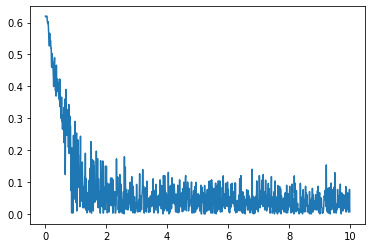

In [237]:
plt.plot(T,m1)

In [37]:
def MCS_step(config,J,H,T):
    kb = 1.380649e-23 # constante de boltzmann [J/K]
    MCSmax = 10**4
    config = np.array(config)
    L = len(config)
    Em = []
    mcsm = []
    Mz = 0
    E = 0
    flag = False
    for mcs in range(MCSmax):
        mcsm.append(mcs)
        #flag = False
        for i in range(L):
            for j in range(L):
                for k in range(L):
                    conf_i = config[i][j][k]
                    d = [config[(i+1)%L][j][k], config[(i-1)%L][j][k], config[i][(j+1)%L][k], 
                         config[i][(j-1)%L][k], config[i][j][(k+1)%L], config[i][j][(k-1)%L]]
                    conf_j = neightbors(d)
                    Ei = -J*np.dot(conf_i,conf_j) - conf_i[2]*H
                    new_zcomp = np.random.choice(m)*mag
                    conf_trial = [conf_i[0],conf_i[1],new_zcomp]
                    Ef = -J*np.dot(conf_trial,conf_j) - conf_trial[2]*H
                    Delta_E = Ef - Ei
                    E += Ei
                    if Delta_E <= 0:
                        conf_i = conf_trial
                        E += Ef
                        #flag = True
                    elif np.random.rand() <= np.exp(-Delta_E/(kb*T)):
                        conf_i = conf_trial
                        E += Ef
                        #flag = True
                    config[i][j][k] = conf_i
                    Em.append(abs(E))
    return config, mcsm

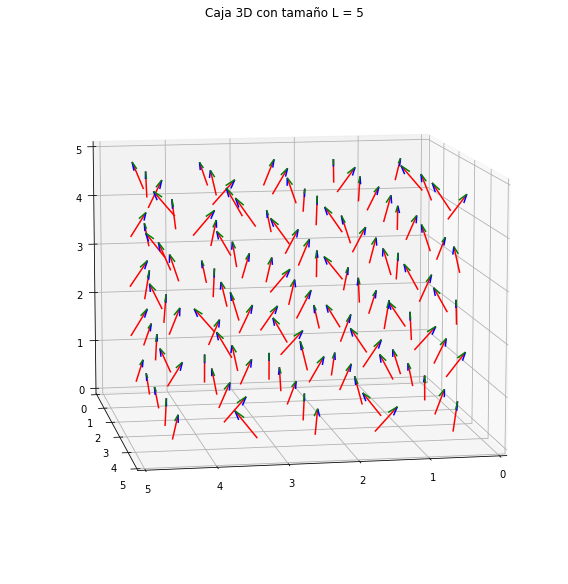

In [176]:
E = [comTotalEnergy(c0,1,100)]
M = [comPromMagnetization(c0)]
#cf,mcs = MCS_step(c0,1,100,10)
E.append(comTotalEnergy(cf,1,100))
M.append(comPromMagnetization(cf))

def graph(conf):
    fig = plt.figure(figsize=(10,8),constrained_layout=True)
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title(f"Caja 3D con tamaño L = {L}")

    for i in range(L):
        for j in range(L):
            for k in range(L):
                origin = np.array([b[i],b[j],b[k]])
                c0m = conf[i][j][k]
                V = np.array([c0m])
                ax.quiver(*origin, V[:,0], V[:,1], V[:,2] ,color=['r','b','g'],pivot='middle')
                continue
    ax.set_xlim(0,L)
    ax.set_ylim(0,L)
    ax.set_zlim(0,L)
    ax.view_init(10,80)
    plt.grid()
    plt.show()

graph(mcn)

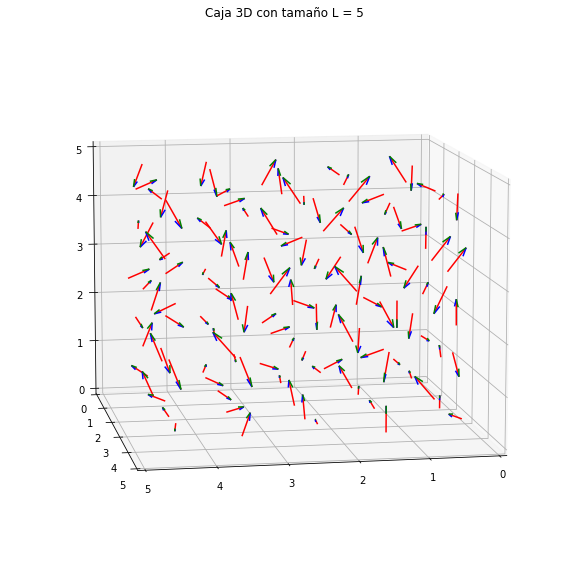

In [128]:
graph(c0)

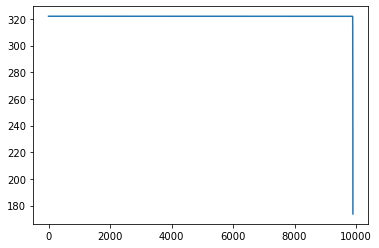

In [87]:
plt.plot(np.arange(len(np.abs(e1)[::-1])),np.abs(e1)[::-1])